In [54]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os

In [74]:
data = np.array([])
for i in range(18):
    ds = xr.open_dataset('./gridmet/tmmn_{0}.nc'.format(int(2001+i)))
    data = np.concatenate((data,ds.air_temperature[:,162,967].data),axis=0)
    ds.close()

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

In [22]:
gl_loc = [44.91,-84.72]
ele_loc = [45.03, -85.67]
sh_loc = [42.36, -86.29]
gr_loc = [42.881,-85.523]
tvc_loc = [44.742, -85.582]
loc = np.array([gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc])
loc_id = loc * 0

ds = xr.open_dataset('./gridmet/tmmn_2001.nc')
for i in range(5):
    loc_id[i, 0] = np.where(abs(ds.lat.values - loc[i,0]) == np.amin(abs(ds.lat.values - loc[i,0])))[0][0]
    loc_id[i, 1] = np.where(abs(ds.lon.values - loc[i,1]) == np.amin(abs(ds.lon.values - loc[i,1])))[0][0]
ds.close()

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,


In [1]:
dt = []
for k in range(5):
    data = np.array([])
    for i in range(18):
        ds = xr.open_dataset('./gridmet/tmmn_{0}.nc'.format(int(2001+i)))
        data = np.concatenate((data,ds.air_temperature[:,int(loc_id[k,0]),int(loc_id[k,1])].data),axis=0)
        ds.close()
    dt.append(data)

In [119]:
dt = np.array(dt)
dt = (dt - 273.15) * (9/5) + 32.0
dt

array([[ 9.41001099,  9.04998901, 12.64998901, ..., 12.64998901,
        21.83      , 17.14998901],
       [22.36997803, 22.54998901, 22.01001099, ..., 19.31001099,
        25.61001099, 19.49002197],
       [20.21001099, 19.31001099, 16.79002197, ..., 29.21001099,
        26.33      , 32.81001099],
       [11.39002197, 13.01001099, 11.03      , ..., 25.79002197,
        26.14998901, 31.54998901],
       [16.06997803, 16.06997803, 16.24998901, ..., 21.29002197,
        25.24998901, 22.36997803]])

In [116]:
# [gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
pr = []
fna = ['Gaylord_PRISM_tmin_stable_4km_19810101_20190101_44.9100_-84.7200.csv',\
      'East_Leland_PRISM_tmin_stable_4km_19810101_20190101_45.0300_-85.6700.csv',\
      'South_Haven_PRISM_tmin_stable_4km_19810101_20190101_42.3600_-86.2900.csv',\
      'Grand_Rapids_PRISM_tmin_stable_4km_19810101_20190101_42.8810_-85.5230.csv',\
       'Traverse_City_PRISM_tmin_stable_4km_19810101_20190101_44.7420_-85.5820.csv']
for i in range(5):
    df = pd.read_csv('./prism/{0}'.format(fna[i]),header=[i for i in range(11)])
    df = np.array(df)[:,0]
    df = df[-6575:-1]
    pr.append(df)

In [75]:
# ds.lat[162]
# ds.lon[967]
gm = data
gm = (gm - 273.15) * (9/5) + 32.0
l = len(gm)
l

6574

In [76]:
pr = pd.read_csv('./prism/PRISM_tmin_stable_4km_19810101_20190101_42.6700_-84.4900.csv',header=[i for i in range(11)])
pr = np.array(pr)[:,0]
pr = pr[-6575:-1]

In [77]:
df_el = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
obs = np.array(t_daymin_obs_el)

In [53]:
daymin = [pr, gm, obs]
ratioc_pr = np.zeros((l,5))*np.nan
ratioc_gm = np.zeros((l,5))*np.nan
ratioc = [ratioc_pr, ratioc_gm]
for i in range(3):
    for j in range(l):
        if np.logical_and((daymin[i][j] <= 32),(daymin[i][j] > 23)):
            daymin[i][j] = 1
        elif np.logical_and((daymin[i][j] <= 23),(daymin[i][j] > 14)):
            daymin[i][j] = 2
        elif np.logical_and((daymin[i][j] <= 14),(daymin[i][j] > 5)):
            daymin[i][j] = 3
        elif np.logical_and((daymin[i][j] <= 5),(daymin[i][j] > -4)):
            daymin[i][j] = 4
        elif np.logical_and((daymin[i][j] <= -4),(daymin[i][j] > -13)):
            daymin[i][j] = 5
        else:
            daymin[i][j] = np.nan
            
        
for i in range(2):
    for j in range(5):
        ratioc[i][:,j] = np.where(np.logical_and((daymin[2][:] == j+1),(daymin[i][:] == j+1)), 1.0, ratioc[i][:,j])
        ratioc[i][:,j] = np.where(np.logical_and((daymin[2][:] == j+1),(daymin[i][:] != j+1)), 0.0, ratioc[i][:,j])


In [59]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')

a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':daymin[0][:]}).groupby(ratiotc.MONTH)['a'].value_counts()
a.to_csv('./summary/onlyel_pr.csv')
a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':daymin[1][:]}).groupby(ratiotc.MONTH)['a'].value_counts()
a.to_csv('./summary/onlyel_gm.csv')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [68]:
ratiotc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[0][:,0],
                         '-10~-5':ratioc[0][:,1],
                         '-15~-10':ratioc[0][:,2],
                         '-20~-15':ratioc[0][:,3],
                         '-25~-20':ratioc[0][:,4]})


ratiotca = pd.DataFrame({
                         '-5~0':ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum() / ratiotc.groupby(ratiotc.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum() / ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum() / ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum() / ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum() / ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca.to_csv('./summary/onlyel_ratiotca_pr.csv')
ratiotca

,-5~0,-10~-5,-15~-10,-20~-15,-25~-20,-5~0_era/obs,-10~-5_era/obs,-15~-10_era/obs,-20~-15_era/obs,-25~-20_era/obs
MONTH,,,,,,,,,,
1,0.628788,0.604317,0.509434,0.662338,0.592593,83.0/132,84.0/139,54.0/106,51.0/77,16.0/27
10,0.709677,NaN,NaN,NaN,NaN,66.0/93,0.0/0,0.0/0,0.0/0,0.0/0
11,0.639175,0.589744,1.000000,0.000000,NaN,124.0/194,46.0/78,6.0/6,0.0/1,0.0/0
12,0.675000,0.651316,0.622642,0.411765,0.666667,135.0/200,99.0/152,33.0/53,7.0/17,4.0/6
2,0.560606,0.558824,0.584906,0.633333,0.500000,74.0/132,76.0/136,62.0/106,38.0/60,10.0/20
3,0.685864,0.711409,0.701754,0.538462,0.666667,131.0/191,106.0/149,40.0/57,7.0/13,2.0/3
4,0.807947,0.750000,NaN,NaN,NaN,122.0/151,15.0/20,0.0/0,0.0/0,0.0/0
5,0.785714,NaN,NaN,NaN,NaN,11.0/14,0.0/0,0.0/0,0.0/0,0.0/0
6,NaN,NaN,NaN,NaN,NaN,0.0/0,0.0/0,0.0/0,0.0/0,0.0/0


In [67]:
ratiotc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratioc[1][:,0],
                         '-10~-5':ratioc[1][:,1],
                         '-15~-10':ratioc[1][:,2],
                         '-20~-15':ratioc[1][:,3],
                         '-25~-20':ratioc[1][:,4]})


ratiotca = pd.DataFrame({
                         '-5~0':ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum() / ratiotc.groupby(ratiotc.MONTH)['-5~0'].count(),
                         '-10~-5':ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum() / ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count(),
                         '-15~-10':ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum() / ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count(),
                         '-20~-15':ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum() / ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count(),
                         '-25~-20':ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum() / ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count(),
                         '-5~0_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                         '-10~-5_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                         '-15~-10_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                         '-20~-15_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                         '-25~-20_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
})
ratiotca.to_csv('./summary/onlyel_ratiotca_gm.csv')
ratiotca

,-5~0,-10~-5,-15~-10,-20~-15,-25~-20,-5~0_era/obs,-10~-5_era/obs,-15~-10_era/obs,-20~-15_era/obs,-25~-20_era/obs
MONTH,,,,,,,,,,
1,0.787879,0.604317,0.622642,0.558442,0.481481,104.0/132,84.0/139,66.0/106,43.0/77,13.0/27
10,0.602151,NaN,NaN,NaN,NaN,56.0/93,0.0/0,0.0/0,0.0/0,0.0/0
11,0.798969,0.538462,0.166667,0.000000,NaN,155.0/194,42.0/78,1.0/6,0.0/1,0.0/0
12,0.795000,0.690789,0.698113,0.470588,0.833333,159.0/200,105.0/152,37.0/53,8.0/17,5.0/6
2,0.583333,0.750000,0.584906,0.483333,0.250000,77.0/132,102.0/136,62.0/106,29.0/60,5.0/20
3,0.727749,0.644295,0.491228,0.307692,0.666667,139.0/191,96.0/149,28.0/57,4.0/13,2.0/3
4,0.629139,0.500000,NaN,NaN,NaN,95.0/151,10.0/20,0.0/0,0.0/0,0.0/0
5,0.428571,NaN,NaN,NaN,NaN,6.0/14,0.0/0,0.0/0,0.0/0,0.0/0
6,NaN,NaN,NaN,NaN,NaN,0.0/0,0.0/0,0.0/0,0.0/0,0.0/0


In [69]:
stations = ['pr','gm']
for s in range(2):
    era = pd.read_csv('./summary/onlyel_{0}.csv'.format(stations[s]), header=None)
    era = era.astype(float).sort_index(axis=1)
    erat = np.zeros((12,5))
    for j in range(5):
        a = [set(era.loc[era[0]==i+1].loc[era[1]==float(j+1)][2]) for i in range(12)]
        for i in range(12):
            if a[i] == set():
                a[i] = 0
            else:
                a[i] = a[i].pop()
        erat[:,j] = a

    ratiotca = pd.read_csv('./summary/onlyel_ratiotca_{0}.csv'.format(stations[s]))
    tca = ratiotca.iloc[1:4]
    ratiotca = ratiotca.drop([1,2,3])
    ratiotca = ratiotca.append(tca)
    ratiotca = ratiotca.reset_index(drop=True)
    obst = np.zeros((12,5))
    for i in range(12):
        obst[i,0] = float(ratiotca['-5~0_era/obs'][i].split('/')[1])
        obst[i,1] = float(ratiotca['-10~-5_era/obs'][i].split('/')[1])
        obst[i,2] = float(ratiotca['-15~-10_era/obs'][i].split('/')[1])
        obst[i,3] = float(ratiotca['-20~-15_era/obs'][i].split('/')[1])
        obst[i,4] = float(ratiotca['-25~-20_era/obs'][i].split('/')[1])
    erata = pd.DataFrame({
                     '-5~0':erat[:,0] / obst[:,0],
                     '-10~-5':erat[:,1] / obst[:,1],
                     '-15~-10':erat[:,2] / obst[:,2],
                     '-20~-15':erat[:,3] / obst[:,3],
                     '-25~-20':erat[:,4] / obst[:,4],
                     '-5~0_era/obs':[str(erat[i,0])+ '/'+ str(obst[i,0]) for i in range(12)],
                     '-10~-5_era/obs':[str(erat[i,1])+ '/'+ str(obst[i,1]) for i in range(12)],
                     '-15~-10_era/obs':[str(erat[i,2])+ '/'+ str(obst[i,2]) for i in range(12)],
                     '-20~-15_era/obs':[str(erat[i,3])+ '/'+ str(obst[i,3]) for i in range(12)],
                     '-25~-20_era/obs':[str(erat[i,4])+ '/'+ str(obst[i,4]) for i in range(12)]
    })
    erata['MONTH'] = ratiotca['MONTH']

    df = pd.concat([ratiotca,erata],sort=False)
    df.to_csv('./summary/onlyel_table_{0}.csv'.format(stations[s]))

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


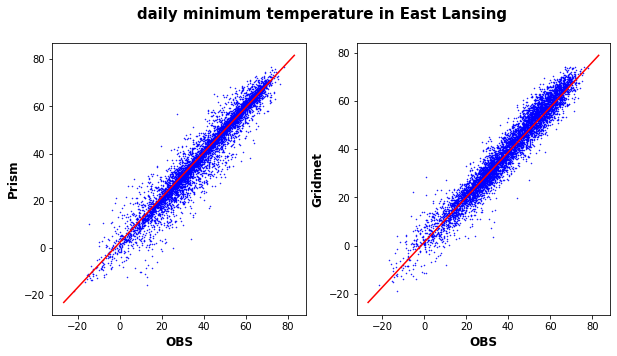

In [92]:
re_data = [pr,gm]
title = ['Prism', 'Gridmet']
plt.subplots(1,2, figsize=(10, 5))
for i in range(2):
    ax = plt.subplot(1,2,i+1)
    plt.plot(obs, re_data[i], 'bo', ms=.5)
    plt.plot(ax.get_xlim(), ax.get_ylim(), 'r')
    plt.ylabel(title[i],  fontsize = 12, fontweight='bold')
    plt.xlabel('OBS',  fontsize = 12, fontweight='bold')
plt.suptitle('daily minimum temperature in East Lansing',  fontsize = 15, fontweight='bold')
            
plt.savefig('./plot/Summary/onlyel_pr_gm.png')

In [39]:
df_gl = pd.read_csv('./observation/CRNH0203-2007-2018-MI_Gaylord_9_SSW_crc.csv')
df_gr = pd.read_csv('./observation/ASOS Grand Rapids_crc.csv')
df_ele = pd.read_csv('./observation/East Leland 5 min.csv')
df_sh = pd.read_csv('./observation/South Haven 5 min_crc.csv')
df_tvc = pd.read_csv('observation/ASOS Traverse City_crc_1.csv')

In [43]:
t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].min()
t_daymin_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].min()
t_daymin_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].min()

In [122]:
# # gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc
pr_dt = [1*pr[0][-4122:],1*pr[1][-5723:],1*pr[2][-4653:],1*pr[3][:-1],1*pr[4][:-1]]
gm_dt = [1*dt[0][-4122:],1*dt[1][-5723:],1*dt[2][-4653:],1*dt[3][:-1],1*dt[4][:-1]]

l = [pr_dt[i].shape[0] for i in range(5)]
ratio_pr = [np.zeros((l[i], 5))*np.nan for i in range(5)]
ratio_gm = [np.zeros((l[i], 5))*np.nan for i in range(5)]
t_daymin_obs = [np.array(t_daymin_obs_gl), np.array(t_daymin_obs_ele),np.array(t_daymin_obs_sh), np.array(t_daymin_obs_gr), np.array(t_daymin_obs_tvc)]


for i in range(5):
    for j in range(l[i]):
        if np.logical_and((t_daymin_obs[i][j] <= 32),(t_daymin_obs[i][j] > 23)):
            t_daymin_obs[i][j] = 1
        elif np.logical_and((t_daymin_obs[i][j] <= 23),(t_daymin_obs[i][j] > 14)):
            t_daymin_obs[i][j] = 2
        elif np.logical_and((t_daymin_obs[i][j] <= 14),(t_daymin_obs[i][j] > 5)):
            t_daymin_obs[i][j] = 3
        elif np.logical_and((t_daymin_obs[i][j] <= 5),(t_daymin_obs[i][j] > -4)):
            t_daymin_obs[i][j] = 4
        elif np.logical_and((t_daymin_obs[i][j] <= -4),(t_daymin_obs[i][j] > -13)):
            t_daymin_obs[i][j] = 5
        else:
            t_daymin_obs[i][j] = np.nan
            
        if np.logical_and((pr_dt[i][j] <= 32),(pr_dt[i][j] > 23)):
            pr_dt[i][j] = 1
        elif np.logical_and((pr_dt[i][j] <= 23),(pr_dt[i][j] > 14)):
            pr_dt[i][j] = 2
        elif np.logical_and((pr_dt[i][j] <= 14),(pr_dt[i][j] > 5)):
            pr_dt[i][j] = 3
        elif np.logical_and((pr_dt[i][j] <= 5),(pr_dt[i][j] > -4)):
            pr_dt[i][j] = 4
        elif np.logical_and((pr_dt[i][j] <= -4),(pr_dt[i][j] > -13)):
            pr_dt[i][j] = 5
        else:
            pr_dt[i][j] = np.nan
            
        if np.logical_and((gm_dt[i][j] <= 32),(gm_dt[i][j] > 23)):
            gm_dt[i][j] = 1
        elif np.logical_and((gm_dt[i][j] <= 23),(gm_dt[i][j] > 14)):
            gm_dt[i][j] = 2
        elif np.logical_and((gm_dt[i][j] <= 14),(gm_dt[i][j] > 5)):
            gm_dt[i][j] = 3
        elif np.logical_and((gm_dt[i][j] <= 5),(gm_dt[i][j] > -4)):
            gm_dt[i][j] = 4
        elif np.logical_and((gm_dt[i][j] <= -4),(gm_dt[i][j] > -13)):
            gm_dt[i][j] = 5
        else:
            gm_dt[i][j] = np.nan

        
for i in range(5):
    for j in range(5):
        ratio_pr[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(pr_dt[i][:] == j+1)), 1.0, ratio_pr[i][:,j])
        ratio_pr[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(pr_dt[i][:] != j+1)), 0.0, ratio_pr[i][:,j])
        
        ratio_gm[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(gm_dt[i][:] == j+1)), 1.0, ratio_gm[i][:,j])
        ratio_gm[i][:,j] = np.where(np.logical_and((t_daymin_obs[i][:] == j+1),(gm_dt[i][:] != j+1)), 0.0, ratio_gm[i][:,j])


In [123]:
import pytz
eastern = pytz.timezone('US/Eastern')
# # gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc
dff = [pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['gl','ele','sh','gr','tvc']
for i in range(5):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    
    ratiot_pr = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratio_pr[i][:,0],
                         '-10~-5':ratio_pr[i][:,1],
                         '-15~-10':ratio_pr[i][:,2],
                         '-20~-15':ratio_pr[i][:,3],
                         '-25~-20':ratio_pr[i][:,4]})
    
    ratiot_gm = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratio_gm[i][:,0],
                         '-10~-5':ratio_gm[i][:,1],
                         '-15~-10':ratio_gm[i][:,2],
                         '-20~-15':ratio_gm[i][:,3],
                         '-25~-20':ratio_gm[i][:,4]})

    
    a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':pr_dt[i][:]}).groupby(ratiot_pr.MONTH)['a'].value_counts()
    a.to_csv('./summary/pr_counts_{0}.csv'.format(locn[i]))
    a = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'a':gm_dt[i][:]}).groupby(ratiot_gm.MONTH)['a'].value_counts()
    a.to_csv('./summary/gm_counts_{0}.csv'.format(locn[i]))

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [124]:
for i in range(5):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    
    ratiotc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratio_pr[i][:,0],
                         '-10~-5':ratio_pr[i][:,1],
                         '-15~-10':ratio_pr[i][:,2],
                         '-20~-15':ratio_pr[i][:,3],
                         '-25~-20':ratio_pr[i][:,4]})
    
    ratiotca = pd.DataFrame({
                             '-5~0':ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum() / ratiotc.groupby(ratiotc.MONTH)['-5~0'].count(),
                             '-10~-5':ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum() / ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count(),
                             '-15~-10':ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum() / ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count(),
                             '-20~-15':ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum() / ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count(),
                             '-25~-20':ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum() / ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count(),
                             '-5~0_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                             '-10~-5_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                             '-15~-10_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                             '-20~-15_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                             '-25~-20_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
    })
    ratiotca.to_csv('./summary/ratiotca_pr_{0}.csv'.format(locn[i]))

In [125]:
for i in range(5):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    
    ratiotc = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,
                         '-5~0':ratio_gm[i][:,0],
                         '-10~-5':ratio_gm[i][:,1],
                         '-15~-10':ratio_gm[i][:,2],
                         '-20~-15':ratio_gm[i][:,3],
                         '-25~-20':ratio_gm[i][:,4]})
    
    ratiotca = pd.DataFrame({
                             '-5~0':ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum() / ratiotc.groupby(ratiotc.MONTH)['-5~0'].count(),
                             '-10~-5':ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum() / ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count(),
                             '-15~-10':ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum() / ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count(),
                             '-20~-15':ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum() / ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count(),
                             '-25~-20':ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum() / ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count(),
                             '-5~0_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-5~0'].count())[i]) for i in  range(12) ],
                             '-10~-5_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-10~-5'].count())[i]) for i in  range(12) ],
                             '-15~-10_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-15~-10'].count())[i]) for i in  range(12) ],
                             '-20~-15_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-20~-15'].count())[i]) for i in  range(12) ],
                             '-25~-20_era/obs':[str(float(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].sum())[i]))+'/'+str(np.array(ratiotc.groupby(ratiotc.MONTH)['-25~-20'].count())[i]) for i in  range(12) ],
    })
    ratiotca.to_csv('./summary/ratiotca_gm_{0}.csv'.format(locn[i]))

In [128]:
for s in range(5):
    era = pd.read_csv('./summary/pr_counts_{0}.csv'.format(locn[s]), header=None)
    era = era.astype(float).sort_index(axis=1)
    erat = np.zeros((12,5))
    for j in range(5):
        a = [set(era.loc[era[0]==i+1].loc[era[1]==float(j+1)][2]) for i in range(12)]
        for i in range(12):
            if a[i] == set():
                a[i] = 0
            else:
                a[i] = a[i].pop()
        erat[:,j] = a

    ratiotca = pd.read_csv('./summary/ratiotca_pr_{0}.csv'.format(locn[s]))
    tca = ratiotca.iloc[1:4]
    ratiotca = ratiotca.drop([1,2,3])
    ratiotca = ratiotca.append(tca)
    ratiotca = ratiotca.reset_index(drop=True)
    obst = np.zeros((12,5))
    for i in range(12):
        obst[i,0] = float(ratiotca['-5~0_era/obs'][i].split('/')[1])
        obst[i,1] = float(ratiotca['-10~-5_era/obs'][i].split('/')[1])
        obst[i,2] = float(ratiotca['-15~-10_era/obs'][i].split('/')[1])
        obst[i,3] = float(ratiotca['-20~-15_era/obs'][i].split('/')[1])
        obst[i,4] = float(ratiotca['-25~-20_era/obs'][i].split('/')[1])
    erata = pd.DataFrame({
                     '-5~0':erat[:,0] / obst[:,0],
                     '-10~-5':erat[:,1] / obst[:,1],
                     '-15~-10':erat[:,2] / obst[:,2],
                     '-20~-15':erat[:,3] / obst[:,3],
                     '-25~-20':erat[:,4] / obst[:,4],
                     '-5~0_era/obs':[str(erat[i,0])+ '/'+ str(obst[i,0]) for i in range(12)],
                     '-10~-5_era/obs':[str(erat[i,1])+ '/'+ str(obst[i,1]) for i in range(12)],
                     '-15~-10_era/obs':[str(erat[i,2])+ '/'+ str(obst[i,2]) for i in range(12)],
                     '-20~-15_era/obs':[str(erat[i,3])+ '/'+ str(obst[i,3]) for i in range(12)],
                     '-25~-20_era/obs':[str(erat[i,4])+ '/'+ str(obst[i,4]) for i in range(12)]
    })
    erata['MONTH'] = ratiotca['MONTH']

    df = pd.concat([ratiotca,erata],sort=False)
    df.to_csv('./summary/table_pr_{0}.csv'.format(locn[s]),index=False)

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [129]:
for s in range(5):
    era = pd.read_csv('./summary/gm_counts_{0}.csv'.format(locn[s]), header=None)
    era = era.astype(float).sort_index(axis=1)
    erat = np.zeros((12,5))
    for j in range(5):
        a = [set(era.loc[era[0]==i+1].loc[era[1]==float(j+1)][2]) for i in range(12)]
        for i in range(12):
            if a[i] == set():
                a[i] = 0
            else:
                a[i] = a[i].pop()
        erat[:,j] = a

    ratiotca = pd.read_csv('./summary/ratiotca_gm_{0}.csv'.format(locn[s]))
    tca = ratiotca.iloc[1:4]
    ratiotca = ratiotca.drop([1,2,3])
    ratiotca = ratiotca.append(tca)
    ratiotca = ratiotca.reset_index(drop=True)
    obst = np.zeros((12,5))
    for i in range(12):
        obst[i,0] = float(ratiotca['-5~0_era/obs'][i].split('/')[1])
        obst[i,1] = float(ratiotca['-10~-5_era/obs'][i].split('/')[1])
        obst[i,2] = float(ratiotca['-15~-10_era/obs'][i].split('/')[1])
        obst[i,3] = float(ratiotca['-20~-15_era/obs'][i].split('/')[1])
        obst[i,4] = float(ratiotca['-25~-20_era/obs'][i].split('/')[1])
    erata = pd.DataFrame({
                     '-5~0':erat[:,0] / obst[:,0],
                     '-10~-5':erat[:,1] / obst[:,1],
                     '-15~-10':erat[:,2] / obst[:,2],
                     '-20~-15':erat[:,3] / obst[:,3],
                     '-25~-20':erat[:,4] / obst[:,4],
                     '-5~0_era/obs':[str(erat[i,0])+ '/'+ str(obst[i,0]) for i in range(12)],
                     '-10~-5_era/obs':[str(erat[i,1])+ '/'+ str(obst[i,1]) for i in range(12)],
                     '-15~-10_era/obs':[str(erat[i,2])+ '/'+ str(obst[i,2]) for i in range(12)],
                     '-20~-15_era/obs':[str(erat[i,3])+ '/'+ str(obst[i,3]) for i in range(12)],
                     '-25~-20_era/obs':[str(erat[i,4])+ '/'+ str(obst[i,4]) for i in range(12)]
    })
    erata['MONTH'] = ratiotca['MONTH']

    df = pd.concat([ratiotca,erata],sort=False)
    df.to_csv('./summary/table_gm_{0}.csv'.format(locn[s]),index=False)

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
